# Creating Custom Layers and Models

Creatubg custom layers and integrating them into a keras model. Compile, train, and evaluate the keras model.

#####  Objectives

- Create custom layers and integrate them into a Keras model
- Compile, train, and evaluate the model


In [1]:
!pip install tensorflow==2.16.2
!pip install pydot graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 506.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    F

#### After installing the libraries, restart the kernel and then run the cells below


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential


Define a custom dense layer with 32 units and ReLU activation.


In [2]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)


Integrate the custom layer into a keras model



In [3]:
from tensorflow.keras.layers import Softmax

# Define the model with Softmax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])


The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.




Compile the model with the Adam optimizer and categorical cross-entropy loss.


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()


Model summary before building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)



Train the model on some example data. For this example, you will generate random data for training. In practice, use a real data set.


In [5]:
import numpy as np

# Generate random data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.3027
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2989
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2971
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2904
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2857
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2863
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2793
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2783
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2669
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2654




Evaluate the model using test data to see its performance.

For this example, you will generate random test data. In practice, use a real data set.


In [6]:
# Generate random test data
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

# Convert labels to categorical one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3221  
Test loss: 2.309969902038574


### Exercises


Visualize the architecture of the custom Keras model to understand its structure.

1. Use the `plot_model` function from `tensorflow.keras.utils` to visualize the model architecture.
2. Save the plot as an image file.


<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


 ```   

</details>


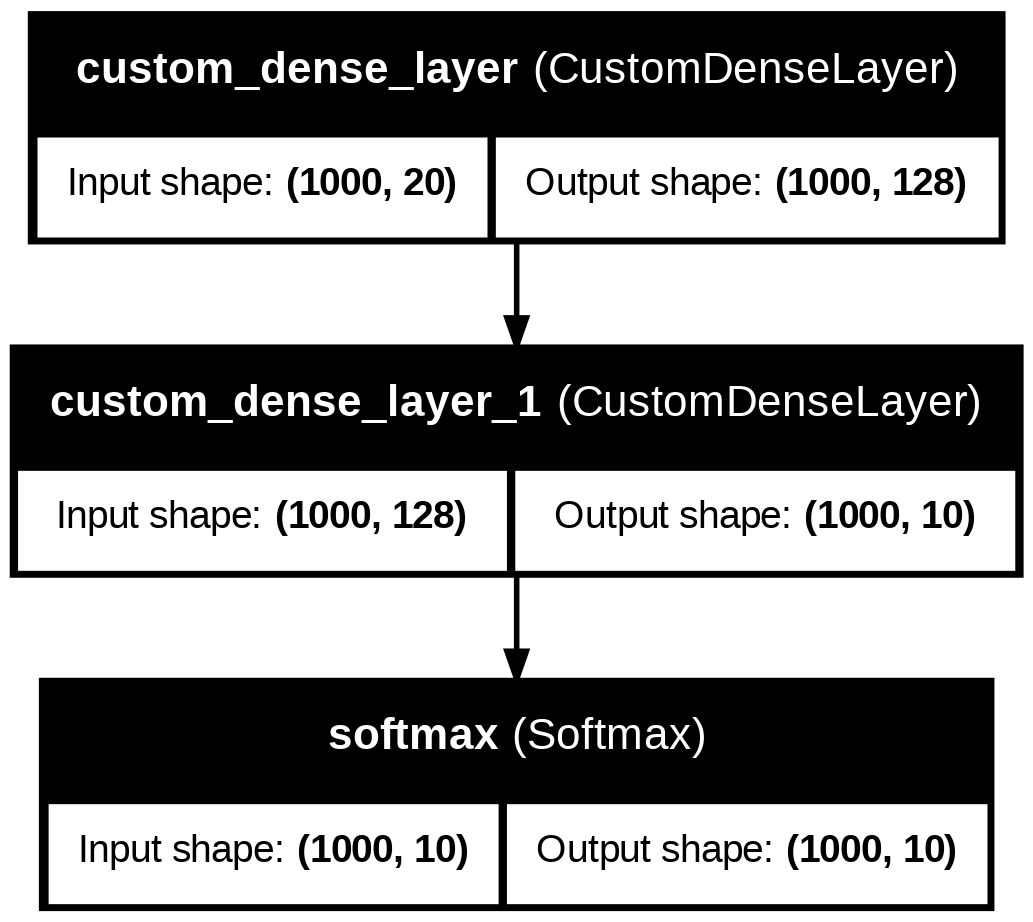

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

Enhance the model by adding a Dropout layer to prevent overfitting.

**Instructions:**
1. Add a Dropout layer between the custom dense layers.
2. Recompile the model and observe the impact on training.


In [11]:
from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer
model = Sequential([
    CustomDenseLayer(64),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss with dropout: {loss}')
print(f'Test accuracy with dropout: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1012 - loss: 9.9097 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1269 - loss: 5.5198
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1052 - loss: 3.8805
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0815 - loss: 4.1442
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0834 - loss: 3.9703
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1369 - loss: 3.4403
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1155 - loss: 3.5320
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1264 - loss: 3.6604
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1178 - loss: 3.6090
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1158 - loss: 3.5096
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0551 - loss: 3.5644  
Test loss with dropout: 3.5312838554382324
Test accuracy with dropout: 0.070000000298

Experimenting with different numbers of units in the custom dense layer to observe the impact on performance.

**Instructions:**
1. Change the number of units in the `CustomDenseLayer` to 128.
2. Recompile, train, and evaluate the model.


In [12]:
from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer
model = Sequential([
    CustomDenseLayer(128),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss with dropout: {loss}')
print(f'Test accuracy with dropout: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 7.6082
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0983 - loss: 2.7420
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1117 - loss: 2.5011
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0896 - loss: 2.4107
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1273 - loss: 2.3517
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0957 - loss: 2.3315
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1221 - loss: 2.3134
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1010 - loss: 2.3170
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0994 - loss: 2.3623
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1040 - loss: 2.3078
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0713 - loss: 2.3410      
Test loss with dropout: 2.3283259868621826
Test accuracy with dropout: 0.094999998

In [20]:
from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer
model = Sequential([
    CustomDenseLayer(128),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss with dropout: {loss}')
print(f'Test accuracy with dropout: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1003 - loss: 8.7781
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1124 - loss: 5.2931
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0972 - loss: 2.5444
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1105 - loss: 2.4204
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1310 - loss: 2.3795
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1070 - loss: 2.3352
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1121 - loss: 2.3264
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1181 - loss: 2.3181
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1132 - loss: 2.3330
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1241 - loss: 2.3261
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0592 - loss: 2.3276  
Test loss with dropout: 2.3204667568206787
Test accuracy with dropout: 0.0700000002980

Copyright © IBM Corporation. All rights reserved.